In [25]:
library(tidyverse)
library(ggpubr)
scientific_10 = function(x) {
  ifelse(
    x==0, "0",
    parse(text = sub("e[+]?", " %*% 10^", scales::scientific_format()(x)))
  )
} 

In [26]:
all.compare = read.csv("repeated_L1_runs_comparisons_2.csv")[-1]

In [27]:
head(all.compare)
all.compare <- all.compare %>%
                mutate(name = paste0(savename1, "_", savename2)) %>%
                mutate(seed = as.factor(seed))
levels(all.compare$seed) <- c(1,2,3,4,5)
all.compare <- all.compare %>% filter(seed != "1", seed != "2")
all.compare$seed <- factor(all.compare$seed)
levels(all.compare$seed) <- c(1,2,3)

,time,jaccard_composition,ac_lag5,savename1,savename2,seed,mode
,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,0,1.0000000,NA,run_data/-8111126088166105136.json,run_data/5995733167005648086.json,-6.455609e+18,seed
2,1,0.3493976,NA,run_data/-8111126088166105136.json,run_data/5995733167005648086.json,-6.455609e+18,seed
3,10,0.2417062,0.2958580,run_data/-8111126088166105136.json,run_data/5995733167005648086.json,-6.455609e+18,seed
4,100,0.2131980,0.2320000,run_data/-8111126088166105136.json,run_data/5995733167005648086.json,-6.455609e+18,seed
5,11,0.2057416,0.2923077,run_data/-8111126088166105136.json,run_data/5995733167005648086.json,-6.455609e+18,seed
6,12,0.2396313,0.3038674,run_data/-8111126088166105136.json,run_data/5995733167005648086.json,-6.455609e+18,seed


Warning message:
"Removed 1260 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 1260 rows containing missing values or values outside the scale range
(`geom_line()`)."


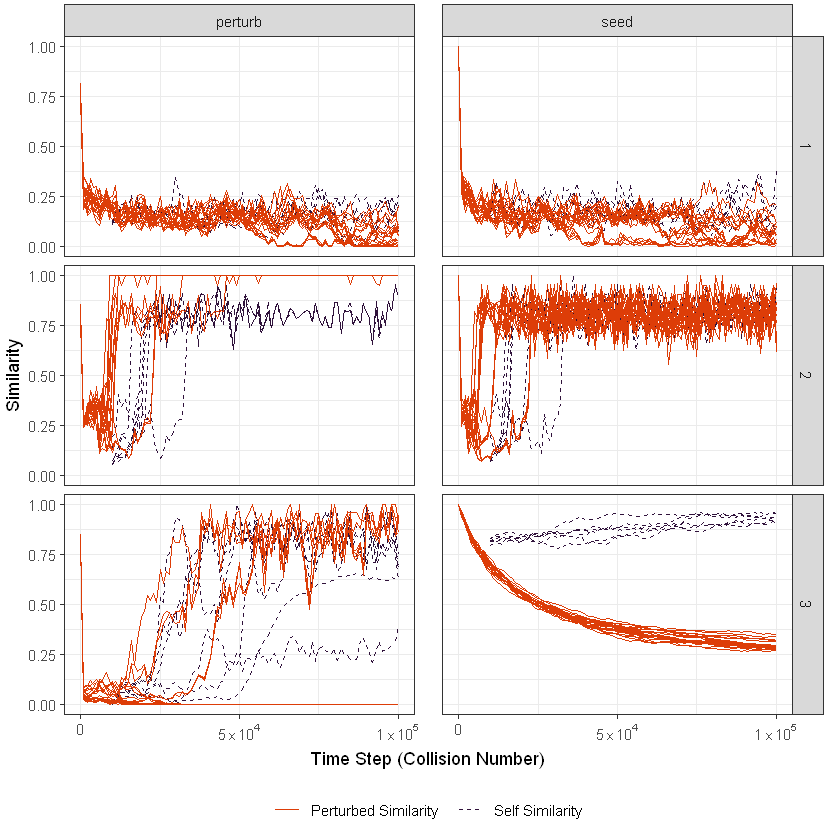

In [49]:
c1 = "#3D0734" # Aubergine: #3D0734
c2 =  "#007BA7"
p <- ggplot(all.compare) +
        geom_line(aes(x = 1000*time,
                        y = ac_lag5,
                        group = name, 
                        color = "Self Similarity"),
                        linetype = 2,
                        linewidth = 0.25,
                        ) + 
        geom_line(aes(x = 1000*time,
                        y = jaccard_composition,
                        group=name,
                        color = "Perturbed Similarity"),
                        linetype = 1,
                        linewidth = 0.25) + 
        
        facet_grid(rows= vars(seed), cols = vars(mode)) +
        theme_bw(base_size = 11) + 
        theme(legend.position = "bottom",
                panel.spacing.x=unit(1.2, "lines"),
                plot.margin = margin(1,3.5,1.5,1, "mm")) + 
        labs(x = "Time Step (Collision Number)", y = "Similarity", linetype="", color = "") +
        # scale_color_manual(values = c(c1, c2)) +
        scale_color_viridis_d(option = "H", end = 0.85, direction = -1) + 
        scale_x_continuous(labels = scientific_10, breaks=c(0, 5e4, 10e4))
p
# q <- ggplot(all.compare) +
#         geom_line(aes(x = 1000*time,
#                         y = ac_lag5,
#                         group = name,
#                         linetype = mode, 
#                         color = mode),
#                         linewidth = 0.25,
#                         ) + 
#         facet_wrap(~seed, nrow = 3) +
#         theme_bw(base_size = 11) + 
#         theme(legend.position = "bottom",
#                 panel.spacing.x=unit(1.2, "lines"),
#                 plot.margin = margin(1,3.5,1.5,1, "mm")) + 
#         labs(x = "Time Step (Collision Number)", y = "Similarity", linetype="Modification: ", color = "Modification: ") +
#         scale_color_manual(values = c(c1, c2)) +
#         scale_x_continuous(labels = scientific_10, breaks=c(0, 5e4, 10e4))
# q
ggsave("Seed_perturbations_v3.svg", p, width= 183*2/3, height = 247/2, units = "mm")

In [50]:

example1 <- "run_data/-153702241610215487.csv"
example2 <- "run_data/-658092190581878262.csv"
run1 <- read.csv(example1)
run2 <- read.csv(example2)
head(run2)

,X,expression,count,time
,<int>,<chr>,<int>,<int>
1,0,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.(x9)\x11.\x12.(x10)\x13.\x14.\x15.\x16.(x15)\x17.\x18.(x16)\x19.\x20.(x14)\x21.\x22.\x23.\x24.\x25.\x26.\x27.(x26)\x28.\x29.(x27)\x30.\x31.\x32.\x33.\x34.(x33)\x35.\x36.(x34)x32,2,0
2,1,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.(x9)\x11.\x12.(x10)\x13.\x14.\x15.\x16.(x15)\x17.\x18.(x16)\x19.\x20.\x21.\x22.\x23.\x24.(x23)\x25.\x26.(x24)\x27.\x28.\x29.(x22)\x30.\x31.\x32.\x33.\x34.(x33)\x35.\x36.(x34)x32,1,0
3,2,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.(x10)\x12.\x13.(x11)x9,1,0
4,3,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.\x12.(x11)\x13.\x14.(x12)\x15.\x16.(x10)\x17.\x18.\x19.\x20.\x21.\x22.\x23.(x22)\x24.\x25.(x23)\x26.\x27.\x28.\x29.\x30.(x29)\x31.\x32.(x30)x28,2,0
5,4,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.\x12.(x11)\x13.\x14.(x12)x10,1,0
6,5,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.\x12.\x13.(x12)\x14.\x15.(x13)\x16.\x17.\x18.\x19.\x20.\x21.\x22.(x21)\x23.\x24.(x22)x20,2,0


In [51]:
sliced_df <- run2 %>% filter(time == 50) %>%
                mutate(expression = reorder(expression, desc(count)))
# sliced_df 

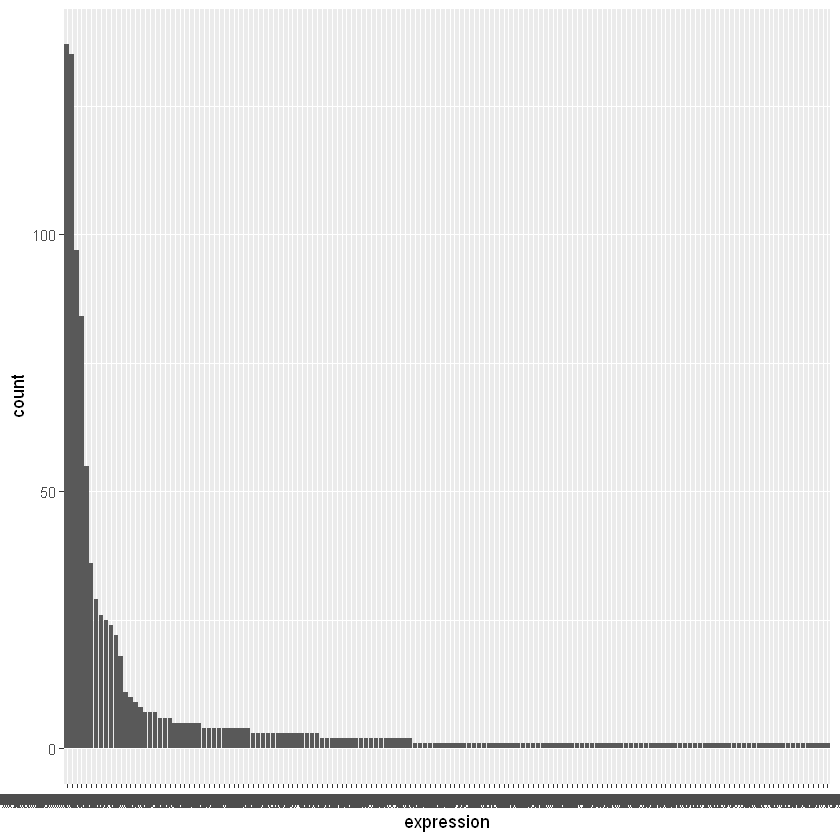

In [52]:
ggplot(sliced_df) + geom_col(aes(x = expression , y=count))

In [53]:
head(all.compare)

,time,jaccard_composition,ac_lag5,savename1,savename2,seed,mode,name
,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>,<chr>
1,0,1.00000000,NA,run_data/8342376740674792706.json,run_data/-658092190581878262.json,1,seed,run_data/8342376740674792706.json_run_data/-658092190581878262.json
2,1,0.33701657,NA,run_data/8342376740674792706.json,run_data/-658092190581878262.json,1,seed,run_data/8342376740674792706.json_run_data/-658092190581878262.json
3,10,0.16535433,0.1725490,run_data/8342376740674792706.json,run_data/-658092190581878262.json,1,seed,run_data/8342376740674792706.json_run_data/-658092190581878262.json
4,100,0.09580838,0.1969697,run_data/8342376740674792706.json,run_data/-658092190581878262.json,1,seed,run_data/8342376740674792706.json_run_data/-658092190581878262.json
5,11,0.20664207,0.2361809,run_data/8342376740674792706.json,run_data/-658092190581878262.json,1,seed,run_data/8342376740674792706.json_run_data/-658092190581878262.json
6,12,0.19269103,0.2300319,run_data/8342376740674792706.json,run_data/-658092190581878262.json,1,seed,run_data/8342376740674792706.json_run_data/-658092190581878262.json


In [87]:
all.compare <- all.compare %>%
                mutate(save_df1 = str_replace(savename1, ".json", ".csv")) %>%
                mutate(save_df2 = str_replace(savename2, ".json", ".csv"))

Example of Low similarity

In [88]:
low.example <- all.compare %>% filter(jaccard_composition < 0.10, jaccard_composition > 0.01) %>% sample_n(1)
sim = low.example$jaccard_composition
df1 <- read.csv(low.example$save_df1[1])
df2 <- read.csv(low.example$save_df2[1])
t = low.example$time[1]

df1 <- df1 %>% filter(time == t, count > 0) %>%
                mutate(expression = reorder(expression, desc(count))) %>%
                select(expression, count)

df2 <- df2 %>% filter(time == t, count > 0) %>% select(expression, count)

head(df1)
print(nrow(df1))
print(nrow(df2))
print(nrow(df1) + nrow(df2))


,expression,count
,<fct>,<int>
1,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.(x9)\x11.\x12.(x10)\x13.\x14.\x15.(x13)\x16.\x17.(x16)\x18.\x19.(x17)\x20.\x21.\x22.\x23.\x24.\x25.(x24)\x26.\x27.(x25)x23,1
2,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.(x9)\x11.\x12.(x10)\x13.\x14.\x15.\x16.\x17.\x18.\x19.(x18)\x20.\x21.(x19)x17,1
3,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.(x10)\x12.\x13.(x11)x9,1
4,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.(x9)\x12.\x13.(x12)\x14.\x15.(x13)\x16.\x17.\x18.\x19.\x20.\x21.(x20)\x22.\x23.(x21)x19,1
5,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.\x12.(x11)\x13.\x14.(x12)\x15.\x16.\x17.\x18.(x17)\x19.\x20.(x18)x16,1
6,\x1.\x2.(x1)\x3.\x4.(x2)\x5.\x6.(x5)\x7.\x8.(x6)\x9.\x10.\x11.\x12.(x11)\x13.\x14.(x12)x10,5


[1] 156
[1] 299
[1] 455


In [89]:

combined.df <- df1 %>% full_join(df2, by = "expression") %>% 
                mutate(count.x = replace_na(count.x, 0), count.y = replace_na(count.y, 0)) %>%
                mutate(diff = abs(count.x - count.y), 
                       e_mean = (count.x + count.y)/2) %>%
                mutate(expression = reorder(expression, desc(e_mean))) %>%
                select(expression, count.x, count.y)  %>%
                pivot_longer(!expression, names_to = "sample", values_to = "count") %>%
                mutate(sample = str_replace(sample, "count.", "")) %>%
                mutate(corrector = ifelse(sample == "y", -1,1))


max_down = max(combined.df %>% filter(sample == "y") %>% pull(count))


Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_col()`)."


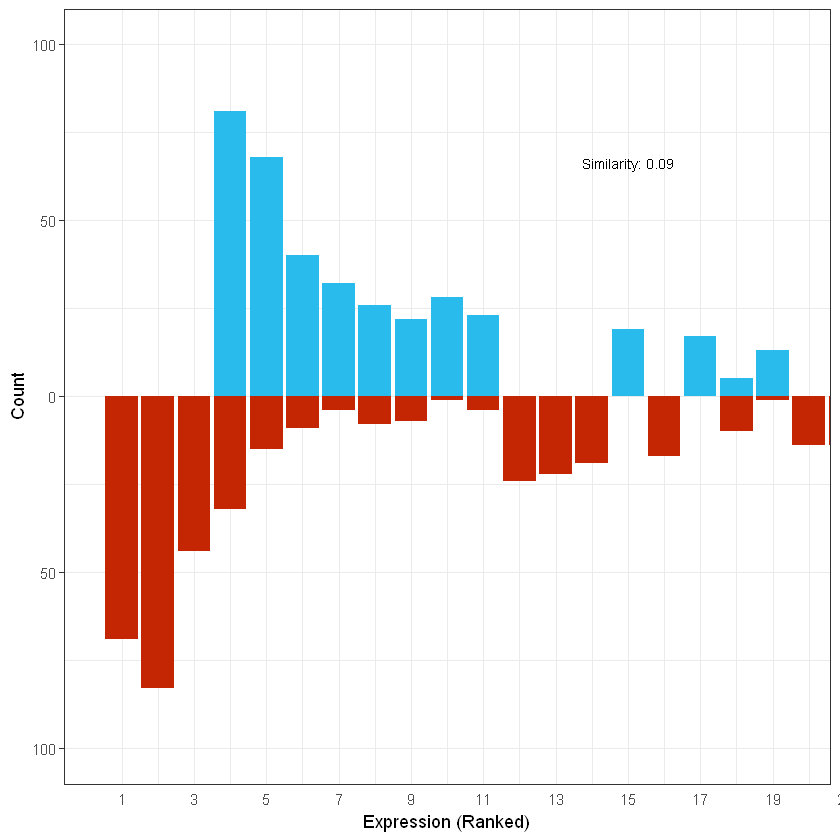

In [90]:
xticks = c(1:25)
xticks[c(FALSE, TRUE)]<-""
plow <- ggplot(combined.df) +
        geom_col(aes(x = expression,
                    y = count*corrector,
                    fill = sample)) + 
        scale_y_continuous(labels = abs, limits = c(-100,100)) +
        labs(x = "Expression (Ranked)", y = "Count", fill = "Sample") + 
        theme_bw(base_size=11) +
        theme(# axis.text.x= element_blank(),
                axis.ticks.x=element_blank(),
                legend.position = "none") +
        coord_cartesian(xlim = c(0, 20)) + 
        scale_x_discrete(labels= c(xticks, '')) +
        scale_fill_viridis_d(option = 'H', begin = 0.25, end = 0.9) +
        annotate("text", x = 15, y = 0.8*max_down, label = paste0("Similarity: ", round(sim, 2)), size = 3)
plow
#rint(sim)


Medium Similarity

In [101]:
med.example <- all.compare %>% filter(jaccard_composition < 0.5, jaccard_composition > 0.15) %>% sample_n(1)
sim = med.example$jaccard_composition
df1 <- read.csv(med.example$save_df1[1])
df2 <- read.csv(med.example$save_df2[1])
t = low.example$time[1]

df1 <- df1 %>% filter(time == t, count > 0) %>%
                mutate(expression = reorder(expression, desc(count))) %>%
                select(expression, count)

df2 <- df2 %>% filter(time == t, count > 0) %>% select(expression, count)

print(nrow(df1))
print(nrow(df2))
print(nrow(df1) + nrow(df2))


[1] 168
[1] 199
[1] 367


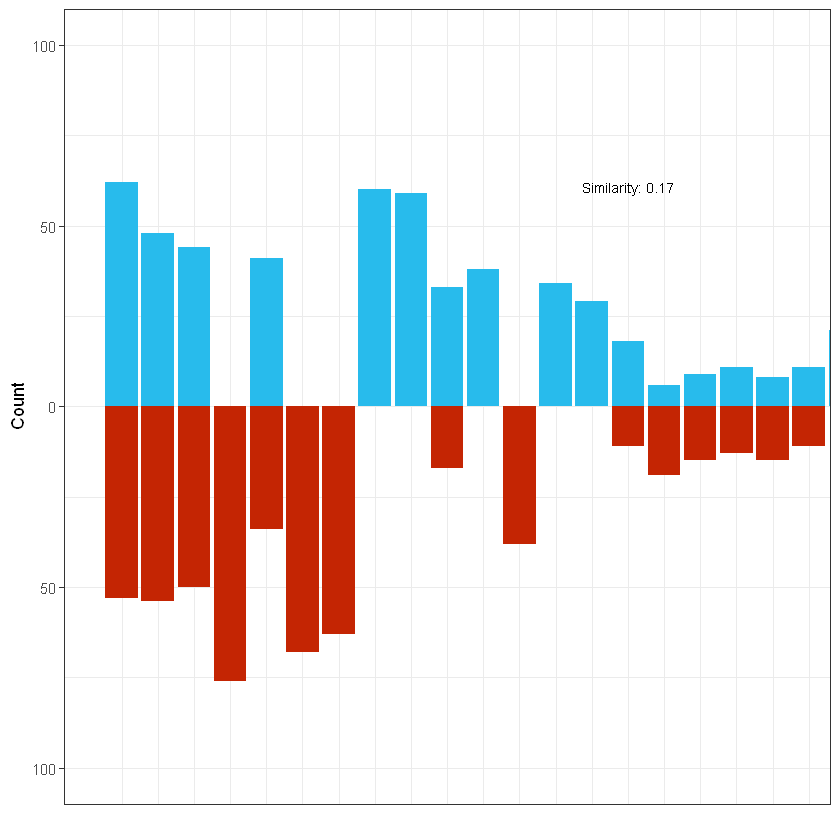

In [102]:

combined.df <- df1 %>% full_join(df2, by = "expression") %>% 
                mutate(count.x = replace_na(count.x, 0), count.y = replace_na(count.y, 0)) %>%
                mutate(diff = abs(count.x - count.y), 
                       e_mean = (count.x + count.y)/2) %>%
                mutate(expression = reorder(expression, desc(e_mean))) %>%
                select(expression, count.x, count.y)  %>%
                pivot_longer(!expression, names_to = "sample", values_to = "count") %>%
                mutate(sample = str_replace(sample, "count.", "")) %>%
                mutate(corrector = ifelse(sample == "y", -1,1)) 

max_down = max(combined.df %>% filter(sample == "y") %>% pull(count))

pmed <- ggplot(combined.df) +
        geom_col(aes(x = expression,
                    y = count*corrector,
                    fill = sample)) + 
        scale_y_continuous(labels = abs, limits= c(-100, 100)) +
        labs(x = " ", y = "Count", fill = "Sample") + 
        theme_bw(base_size=11) +
        theme(axis.text.x= element_blank(),
                axis.ticks.x=element_blank(),
                legend.position = "none") +
        coord_cartesian(xlim = c(0, 20)) + 
        #scale_x_discrete(labels= c(1:25, '')) +
        scale_fill_viridis_d(option = 'H', begin = 0.25, end = 0.9) +
        annotate("text", x = 15, y = 0.8*max_down, label = paste0("Similarity: ", round(sim, 2)), size = 3)
pmed
# print(sim)

High Example

In [93]:
high.example <- all.compare %>% filter(jaccard_composition < 0.976, jaccard_composition > 0.75) %>% sample_n(1)
sim = high.example$jaccard_composition
df1 <- read.csv(high.example$save_df1[1])
df2 <- read.csv(high.example$save_df2[1])
t = high.example$time[1]

df1 <- df1 %>% filter(time == t, count > 0) %>%
                mutate(expression = reorder(expression, desc(count))) %>%
                select(expression, count)

df2 <- df2 %>% filter(time == t, count > 0) %>% select(expression, count)


[1] 23
[1] 21
[1] 44


[1] 0.76


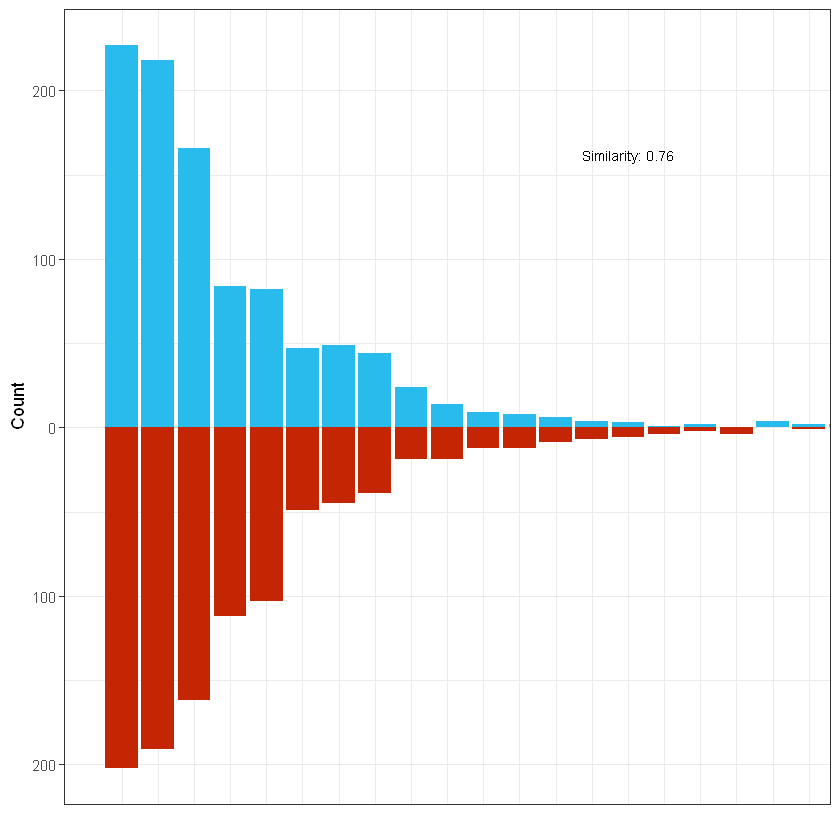

In [94]:

print(nrow(df1))
print(nrow(df2))
print(nrow(df1) + nrow(df2))

combined.df <- df1 %>% full_join(df2, by = "expression") %>% 
                mutate(count.x = replace_na(count.x, 0), count.y = replace_na(count.y, 0)) %>%
                mutate(diff = abs(count.x - count.y), 
                       e_mean = (count.x + count.y)/2) %>%
                mutate(expression = reorder(expression, desc(e_mean))) %>%
                select(expression, count.x, count.y)  %>%
                pivot_longer(!expression, names_to = "sample", values_to = "count") %>%
                mutate(sample = str_replace(sample, "count.", "")) %>%
                mutate(corrector = ifelse(sample == "y", -1,1))
max_down = max(combined.df %>% filter(sample == "y") %>% pull(count))
phigh <- ggplot(combined.df) +
        geom_col(aes(x = expression,
                    y = count*corrector,
                    fill = sample)) + 
        scale_y_continuous(labels = abs) +
        labs(x = " ", y = "Count", fill = "Sample") + 
        theme_bw(base_size=11) +
        theme(axis.text.x= element_blank(),
                axis.ticks.x=element_blank(),
                legend.position = "none") +
        coord_cartesian(xlim = c(0, 20)) + 
        # scale_x_discrete(labels= c(1:25, '')) +
        scale_fill_viridis_d(option = 'H', begin = 0.25, end = 0.9) +
        annotate("text", x = 15, y = 0.8*max_down, label = paste0("Similarity: ", round(sim, 2)), size = 3)
phigh
print(sim)

In [103]:
pall <- ggarrange(phigh, pmed, plow, ncol = 1)

ggsave("example_sims_v3.svg", pall, width = 183*(1/3), height = 247/2, units = "mm")

Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_col()`)."


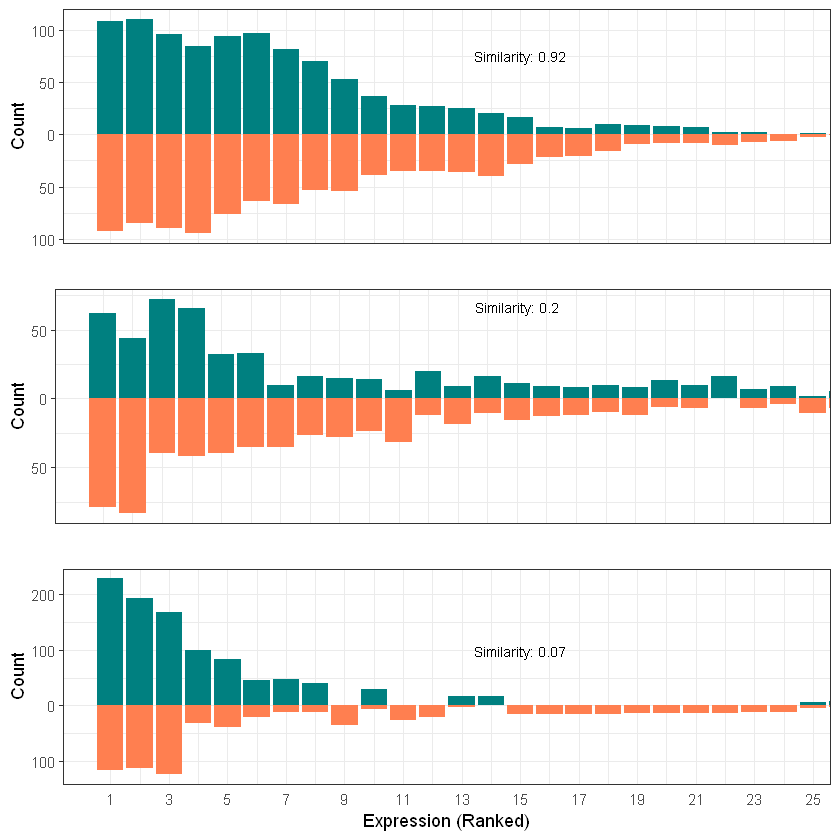

In [107]:
pall